<a href="https://colab.research.google.com/github/eridanletalis/GB_nn/blob/main/clasterisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Кластеризация с использованием ИНС

Задача кластеризации - это задача группировки по набору признаков. Особенностью процесса является то, что процесс происходит без учителя. Кластеризация применяется в автоматическом извлечении информации или закономерностей из массива данных.


Рассмотрим некоторые популярные и классические методы кластеризации.


#Сеть Кохонена
(Источники
https://sci-hub.hkvisa.net/10.1109/5.58325
https://studfile.net/preview/6069145/page:17/
https://github.com/cgorman/tensorflow-som)

Есть несколько видов сетей Кохонена, здесь рассмотрена Самоорганизующаяся карта (Self-Organized Map, SOM).
Особенностью SOM является проецирование многомерного пространства в пространство более низкой размерности (2, 3).

SOM способна распознавать кластеры в данных, а также устанавливать близость классов. Таким образом можно улучшить понимание структуры данных, чтобы затем уточнить модель. 
Если построить карту Кохонена, содержащую кластеры для каждой группы клиентов по степени их лояльности, то с ее помощью можно предсказывать ожидаемое поведение клиентом и применять к ним соответствующую маркетинговую политику.
Карта Кохонена распознает кластеры в обучающих данных и относит все данные к тем или иным кластерам. Если после этого карта встретится с набором данных, непохожим ни на один из известных образцов, то она не сможет классифицировать такой набор и тем самым выявит его аномальность.

SOM представляет собой обычно сетку с двумерными или шестиугольными ячейками, в узлах которых расположены нейроны
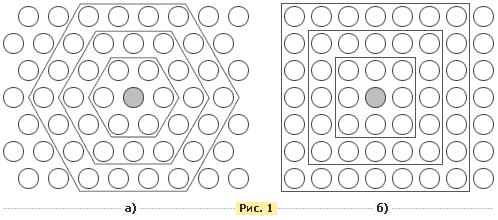

 При реализации алгоритма SOM заранее задается конфигурация сети (прямоугольная или шестиугольная), а также количество нейронов в сети.  При этом начальный радиус обучения в значительной степени влияет на способность обобщения при помощи полученной карты. В случае, когда количество узлов карты превышает количество примеров в обучающей выборке, то успех использования алгоритма в большой степени зависит от подходящего выбора начального радиуса обучения. Однако, в случае, когда размер карты составляет десятки тысяч нейронов, то время, требуемое на обучение карты обычно бывает слишком велико для решения практических задач, таким образом, необходимо достигать допустимого компромисса при выборе количества узлов.

Перед началом обучения карты необходимо проинициализировать весовые коэффициенты нейронов. Удачно выбранный способ инициализации может существенно ускорить обучение, и привести к получению более качественных результатов. Существуют три способа инициирования начальных весов.



*   Инициализация случайными значениями, когда всем весам даются малые случайные величины.
*   Инициализация примерами, когда в качестве начальных значений задаются значения случайно выбранных примеров из обучающей выборки
*   Линейная инициализация. В этом случае веса инициируются значениями векторов, линейно упорядоченных вдоль линейного подпространства, проходящего между двумя главных собственными векторами исходного набора данных. Собственные вектора могут быть найдены например при помощи процедуры Грама-Шмидта.

Обучение состоит из последовательности коррекций векторов, представляющих собой нейроны. На каждом шаге обучения из исходного набора данным случайно выбирается один из векторов, а затем производится поиск наиболее похожего на него вектора коэффициентов нейронов. При этом выбирается нейрон-победитель, который наиболее похож на вектор входов. Под похожестью в данной задаче понимается расстояние между векторами, обычно вычисляемое в евклидовом пространстве. После того, как найден нейрон-победитель производится корректировка весов нейросети. При этом вектор, описывающий нейрон-победитель и вектора, описывающие его соседей в сетке перемещаются в направлении входного вектора.








Далее предложен код, демонстрирующий процесс обучения SOM с прямоугольными ячейчами (взято на гитхабе, источник указан выше). Код доработан для запуска на tf2 и в среде колаб.

In [1]:
!pip install -U tensorflow_transform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 439 kB 21.0 MB/s 
     |████████████████████████████████| 511.7 MB 6.1 kB/s 
     |████████████████████████████████| 21.6 MB 1.5 MB/s 
     |████████████████████████████████| 10.9 MB 39.8 MB/s 
     |████████████████████████████████| 151 kB 75.5 MB/s 
     |████████████████████████████████| 508 kB 70.3 MB/s 
     |████████████████████████████████| 270 kB 70.4 MB/s 
     |████████████████████████████████| 47 kB 5.7 MB/s 
     |████████████████████████████████| 62 kB 2.0 MB/s 
     |████████████████████████████████| 2.4 MB 57.2 MB/s 
     |████████████████████████████████| 267 kB 75.3 MB/s 
     |████████████████████████████████| 183 kB 75.4 MB/s 
     |████████████████████████████████| 267 kB 77.6 MB/s 
     |████████████████████████████████| 173 kB 75.5 MB/s 
     |████████████████████████████████| 255 kB 69.6 MB/s 
     |███████████████████████████

In [2]:
!pip install numpy-hilbert-curve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for numpy-hilbert-curve: filename=numpy_hilbert_curve-1.0.1-py3-none-any.whl size=6954 sha256=a2caeb9ce5de91caeb71bcdb62262e38fca3ea03ab648f408a8abef25659db3d
  Stored in directory: /root/.cache/pip/wheels/aa/50/aa/cc75da43321e28ebe4cfbb05b51af5048e4615c1d3ea1595c8
Successfully built numpy-hilbert-curve


In [3]:
# MIT License
#
# Copyright (c) 2018 Chris Gorman
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.
# =================================================================================
import tensorflow as tf
import tensorflow_transform as tft
import tensorflow_probability as tfp
import numpy as np
from pathlib import Path
import logging
from hilbert import decode, encode
from sklearn.preprocessing import MinMaxScaler

__author__ = "Chris Gorman"
__email__ = "chris@cgorman.net"

"""
Adapted from code by Sachin Joglekar
https://codesachin.wordpress.com/2015/11/28/self-organizing-maps-with-googles-tensorflow/
"""

'\nAdapted from code by Sachin Joglekar\nhttps://codesachin.wordpress.com/2015/11/28/self-organizing-maps-with-googles-tensorflow/\n'

Автором был реализован класс, который принимает на вход число размерность сетки (m, n, число нейронов будет вычислено, как произведение m и n), размерность входных данных, т.е. число признаков на единицу данных, количество эпох тренировки, коэффициент обучения, коэффициент стандартного отклонения и другие настроечные параметры, в т.ч. параметр, отвечающий за возможность обучения на видеокарте средствами tf.

In [4]:
class SelfOrganizingMap:
    """
    2-D rectangular grid planar Self-Organizing Map with Gaussian neighbourhood function
    """

    def __init__(self, m, n, dim, max_epochs=100, initial_radius=None, batch_size=128, initial_learning_rate=0.1,
                 graph=None, std_coeff=0.5, model_name='Self-Organizing-Map', softmax_activity=False, gpus=1,
                 output_sensitivity=-1.0, input_tensor=None, input_dataset=None, session=None, checkpoint_dir=None, restore_path=None, weights_init=None):
        """
        Initialize a self-organizing map on the tensorflow graph
        :param m: Number of rows of neurons
        :param n: Number of columns of neurons
        :param dim: Dimensionality of the input data
        :param max_epochs: Number of epochs to train for
        :param initial_radius: Starting value of the neighborhood radius - defaults to max(m, n) / 2.0
        :param batch_size: Number of input vectors to train on at a time
        :param initial_learning_rate: The starting learning rate of the SOM. Decreases linearly w/r/t `max_epochs`
        :param graph: The tensorflow graph to build the network on
        :param std_coeff: Coefficient of the standard deviation of the neighborhood function
        :param model_name: The name that will be given to the checkpoint files
        :param softmax_activity: If `True` the activity will be softmaxed to form a probability distribution
        :param gpus: The number of GPUs to train the SOM on
        :param output_sensitivity The constant controlling the width of the activity gaussian. Numbers further from zero
                elicit activity when distance is low, effectively introducing a threshold on the distance w/r/t activity.
                See the plot in the readme file for a little introduction.
        :param session: A `tf.Session()` for executing the graph
        :param input_dataset: holds the complete dataset, often used for PCA
        :param weights_init: HCV = Hilber Curve init, PCA = Principal Component Analysis
        """
        self._m = abs(int(m))
        self._n = abs(int(n))
        self._dim = abs(int(dim))
        if initial_radius is None:
            self._initial_radius = max(m, n) / 2.0
        else:
            self._initial_radius = float(initial_radius)
        self._max_epochs = abs(int(max_epochs))
        self._batch_size = abs(int(batch_size))
        self._std_coeff = abs(float(std_coeff))
        self._softmax_activity = bool(softmax_activity)
        self._model_name = str(model_name)
        if output_sensitivity > 0:
            output_sensitivity *= -1
        elif output_sensitivity == 0:
            output_sensitivity = -1
        # The activity equation is kind of long so I'm naming this c for brevity
        self._c = float(output_sensitivity)
        self._sess = session
        self._checkpoint_dir = checkpoint_dir
        self._restore_path = restore_path
        self._gpus = int(abs(gpus))
        self._trained = False

        # Initialized later, just declaring up here for neatness and to avoid warnings
        self._weights = None
        self._location_vects = None
        self._input = None
        self._epoch = None
        self._training_op = None
        self._centroid_grid = None
        self._locations = None
        self._activity_op = None
        self._saver = None
        self._merged = None
        self._activity_merged = None
        # This will be the collection of summaries for this subgraph. Add new summaries to it and pass it to merge()
        self._summary_list = list()
        self._input_tensor = input_tensor

        self._input_dataset = input_dataset
        self._weights_init = str(weights_init)

        if graph is None:
            self._graph = tf.Graph()
        elif type(graph) is not tf.Graph:
            raise AttributeError('SOM graph input is not of type tf.Graph')
        else:
            self._graph = graph
        self._initial_learning_rate = initial_learning_rate
        # Create the ops and put them on the graph
        self._initialize_tf_graph()
        # If we want to reload from a save this will do that
        self._maybe_reload_from_checkpoint()

    def _save_checkpoint(self, global_step):
        """ Save a checkpoint file
        :param global_step: The current step of the network.
        """
        if self._saver is None:
            # Create the saver object
            self._saver = tf.compat.v1.train.Saver()
        if self._checkpoint_dir is not None:
            output_name = Path(self._checkpoint_dir) / self._model_name
            self._saver.save(self._sess, output_name, global_step=global_step)

    def _maybe_reload_from_checkpoint(self):
        """ If the program was called with a checkpoint argument, load the variables from that.
        We are assuming that if it's loaded then it's already trained.
        """
        if self._saver is None:
            self._saver = tf.compat.v1.train.Saver()

        if self._restore_path is not None:
            logging.info("Restoring variables from checkpoint file {}".format(
                self._restore_path))
            self._saver.restore(self._sess, Path(self._restore_path))
            self._trained = True
            logging.info("Checkpoint loaded")

    def _neuron_locations(self):
        """ Maps an absolute neuron index to a 2d vector for calculating the neighborhood function """
        for i in range(self._m):
            for j in range(self._n):
                yield np.array([i, j])

    def _initialize_tf_graph(self):
        """ Initialize the SOM on the TensorFlow graph
        In multi-gpu mode it will duplicate the model across the GPUs and use the CPU to calculate the final
        weight updates.
        """
        with self._graph.as_default(), tf.compat.v1.variable_scope(tf.compat.v1.get_variable_scope()), tf.device('/cpu:0'):
            # This list will contain the handles to the numerator and denominator tensors for each of the towers
            tower_updates = list()
            # This is used by all of the towers and needs to be fed to the graph, so let's put it here
            with tf.compat.v1.name_scope('Epoch'):
                self._epoch = tf.compat.v1.placeholder("float", [], name="iter")
            if self._gpus > 0:
                for i in range(self._gpus):
                    # We only want the summaries of the last tower, so wipe it out each time
                    self._summary_list = list()
                    with tf.device('/gpu:{}'.format(i)):
                        with tf.compat.v1.name_scope('Tower_{}'.format(i)) as scope:
                            # Create the model on this tower and add the (numerator, denominator) tensors to the list
                            tower_updates.append(self._tower_som())
                            tf.compat.v1.get_variable_scope().reuse_variables()

                with tf.device('/gpu:{}'.format(self._gpus - 1)):
                    # Put the activity op on the last GPU
                    self._activity_op = self._make_activity_op(
                        self._input_tensor)
            else:
                # Running CPU only
                with tf.compat.v1.name_scope("Tower_0") as scope:
                    tower_updates.append(self._tower_som())
                    tf.compat.v1.get_variable_scope().reuse_variables()
                    self._activity_op = self._make_activity_op(
                        self._input_tensor)

            with tf.compat.v1.name_scope("Weight_Update"):
                # Get the outputs
                numerators, denominators = zip(*tower_updates)
                # Add them up
                numerators = tf.reduce_sum(input_tensor=tf.stack(numerators), axis=0)
                denominators = tf.reduce_sum(input_tensor=tf.stack(denominators), axis=0)
                # Divide them
                new_weights = tf.divide(numerators, denominators)
                # Assign them
                self._training_op = tf.compat.v1.assign(self._weights, new_weights)

    def _tower_som(self):
        """ Build a single SOM tower on the TensorFlow graph """
        # Randomly initialized weights for all neurons, stored together
        # as a matrix Variable of shape [num_neurons, input_dims]
        with tf.compat.v1.name_scope('Weights'):
            # Each tower will get its own copy of the weights variable. Since the towers are constructed sequentially,
            # the handle to the Tensors will be different for each tower even if we reference "self"
            
            #PCA INIT
            if self._weights_init == "PCA":
              self._weights = self._pca_weights_init()
            #HILBERT INIT
            elif self._weights_init == "HCV":
              self._weights = self._hcv_weight_init(2)
            #RANDOM INIT
            else:
              self._weights = tf.compat.v1.get_variable(name='weights',
                                                          shape=[
                                                              self._m * self._n, self._dim],
                                                          initializer=tf.compat.v1.random_uniform_initializer(minval=0, maxval=1))

            with tf.compat.v1.name_scope('summaries'):
                # All summary ops are added to a list and then the merge() function is called at the end of
                # this method
                mean = tf.reduce_mean(input_tensor=self._weights)
                self._summary_list.append(tf.compat.v1.summary.scalar('mean', mean))
                with tf.compat.v1.name_scope('stdev'):
                    stdev = tf.sqrt(tf.reduce_mean(
                        input_tensor=tf.math.squared_difference(self._weights, mean)))
                self._summary_list.append(tf.compat.v1.summary.scalar('stdev', stdev))
                self._summary_list.append(tf.compat.v1.summary.scalar(
                    'max', tf.reduce_max(input_tensor=self._weights)))
                self._summary_list.append(tf.compat.v1.summary.scalar(
                    'min', tf.reduce_min(input_tensor=self._weights)))
                self._summary_list.append(
                    tf.compat.v1.summary.histogram('histogram', self._weights))

        # Matrix of size [m*n, 2] for SOM grid locations of neurons.
        # Maps an index to an (x,y) coordinate of a neuron in the map for calculating the neighborhood distance
        self._location_vects = tf.constant(np.array(
            list(self._neuron_locations())), name='Location_Vectors')

        with tf.compat.v1.name_scope('Input'):
            self._input = tf.identity(self._input_tensor)

        # Start by computing the best matching units / winning units for each input vector in the batch.
        # Basically calculates the Euclidean distance between every
        # neuron's weight vector and the inputs, and returns the index of the neurons which give the least value
        # Since we are doing batch processing of the input, we need to calculate a BMU for each of the individual
        # inputs in the batch. Will have the shape [batch_size]

        # Oh also any time we call expand_dims it's almost always so we can make TF broadcast stuff properly
        with tf.compat.v1.name_scope('BMU_Indices'):
            # Distance between weights and the input vector
            # Note we are reducing along 2nd axis so we end up with a tensor of [batch_size, num_neurons]
            # corresponding to the distance between a particular input and each neuron in the map
            # Also note we are getting the squared distance because there's no point calling sqrt or tf.norm
            # if we're just doing a strict comparison
            squared_distance = tf.reduce_sum(
                input_tensor=tf.pow(tf.subtract(tf.expand_dims(self._weights, axis=0),
                                   tf.expand_dims(self._input, axis=1)), 2), axis=2)

            # Get the index of the minimum distance for each input item, shape will be [batch_size],
            bmu_indices = tf.argmin(input=squared_distance, axis=1)

        # This will extract the location of the BMU in the map for each input based on the BMU's indices
        with tf.compat.v1.name_scope('BMU_Locations'):
            # Using tf.gather we can use `bmu_indices` to index the location vectors directly
            bmu_locs = tf.reshape(
                tf.gather(self._location_vects, bmu_indices), [-1, 2])

        with tf.compat.v1.name_scope('Learning_Rate'):
            # With each epoch, the initial sigma value decreases linearly
            radius = tf.subtract(self._initial_radius,
                                 tf.multiply(self._epoch,
                                             tf.divide(tf.cast(tf.subtract(self._initial_radius, 1),
                                                               tf.float32),
                                                       tf.cast(tf.subtract(self._max_epochs, 1),
                                                               tf.float32))))

            alpha = tf.multiply(self._initial_learning_rate,
                                tf.subtract(1.0, tf.divide(tf.cast(self._epoch, tf.float32),
                                                           tf.cast(self._max_epochs, tf.float32))))
            
            # Construct the op that will generate a matrix with learning rates for all neurons and all inputs,
            # based on iteration number and location to BMU

            # Start by getting the squared difference between each BMU location and every other unit in the map
            # bmu_locs is [batch_size, 2], i.e. the coordinates of the BMU for each input vector.
            # location vects shape should be [1, num_neurons, 2]
            # bmu_locs should be [batch_size, 1, 2]
            # Output needs to be [batch_size, num_neurons], i.e. a row vector of distances for each input item
            bmu_distance_squares = tf.reduce_sum(input_tensor=tf.pow(tf.subtract(
                tf.expand_dims(self._location_vects, axis=0),
                tf.expand_dims(bmu_locs, axis=1)), 2), axis=2)

            # Using the distances between each BMU, construct the Gaussian neighborhood function.
            # Basically, neurons which are close to the winner will move more than those further away.
            # The radius tensor decreases the width of the Gaussian over time, so early in training more
            # neurons will be affected by the winner and by the end of training only the winner will move.
            # This tensor will be of shape [batch_size, num_neurons] as well and will be the value multiplied to
            # each neuron based on its distance from the BMU for each input vector
            neighbourhood_func = tf.exp(tf.divide(tf.negative(tf.cast(
                bmu_distance_squares, "float32")), tf.multiply(
                tf.square(tf.multiply(radius, self._std_coeff)), 2)))

            # Finally multiply by the learning rate to decrease overall neuron movement over time
            learning_rate_op = tf.multiply(neighbourhood_func, alpha)

        # The batch formula for SOMs multiplies a neuron's neighborhood by all of the input vectors in the batch,
        # then divides that by just the sum of the neighborhood function for each of the inputs.
        # We are writing this in a way that performs that operation for each of the neurons in the map.
        with tf.compat.v1.name_scope('Update_Weights'):
            # The numerator needs to be shaped [num_neurons, dimensions] to represent the new weights
            # for each of the neurons. At this point, the learning rate tensor will be
            # shaped [batch_size, neurons].
            # The end result is that, for each neuron in the network, we use the learning
            # rate between it and each of the input vectors, to calculate a new set of weights.
            numerator = tf.reduce_sum(input_tensor=tf.multiply(tf.expand_dims(learning_rate_op, axis=-1),
                                                  tf.expand_dims(self._input, axis=1)), axis=0)

            # The denominator is just the sum of the neighborhood functions for each neuron, so we get the sum
            # along axis 1 giving us an output shape of [num_neurons]. We then expand the dims so we can
            # broadcast for the division op. Again we transpose the learning rate tensor so it's
            # [num_neurons, batch_size] representing the learning rate of each neuron for each input vector
            denominator = tf.expand_dims(tf.reduce_sum(input_tensor=learning_rate_op,
                                                       axis=0) + float(1e-12), axis=-1)

        # We on;y really care about summaries from one of the tower SOMs, so assign the merge op to
        # the last tower we make. Otherwise there's way too many on Tensorboard.
        self._merged = tf.compat.v1.summary.merge(self._summary_list)

        # With multi-gpu training we collect the results and do the weight assignment on the CPU
        return numerator, denominator

    def _make_activity_op(self, input_tensor):
        """ Creates the op for calculating the activity of a SOM
        :param input_tensor: A tensor to calculate the activity of. Must be of shape `[batch_size, dim]` where `dim` is
        the dimensionality of the SOM's weights.
        :return A handle to the newly created activity op:
        """
        with self._graph.as_default():
            with tf.compat.v1.name_scope("Activity"):
                # This constant controls the width of the gaussian.
                # The closer to 0 it is, the wider it is.
                c = tf.constant(self._c, dtype="float32")
                # Get the euclidean distance between each neuron and the input vectors
                dist = tf.norm(tensor=tf.subtract(
                    tf.expand_dims(self._weights, axis=0),
                    tf.expand_dims(input_tensor, axis=1)),
                    name="Distance", axis=2)  # [batch_size, neurons]

                # Calculate the Gaussian of the activity. Units with distances closer to 0 will have activities
                # closer to 1.
                activity = tf.exp(tf.multiply(
                    tf.pow(dist, 2), c), name="Gaussian")

                # Convert the activity into a softmax probability distribution
                if self._softmax_activity:
                    activity = tf.divide(tf.exp(activity),
                                         tf.expand_dims(tf.reduce_sum(
                                             input_tensor=tf.exp(activity), axis=1), axis=-1),
                                         name="Softmax")

                return tf.identity(activity, name="Output")

    def get_activity_op(self):
        return self._activity_op

    def train(self, num_inputs, writer=None, step_offset=0):
        """ Train the network on the data provided by the input tensor.
        :param num_inputs: The total number of inputs in the data-set. Used to determine batches per epoch
        :param writer: The summary writer to add summaries to. This is created by the caller so when we stack layers
                        we don't end up with duplicate outputs. If `None` then no summaries will be written.
        :param step_offset: The offset for the global step variable so I don't accidentally overwrite my summaries
        """
        # Divide by num_gpus to avoid accidentally training on the same data a bunch of times
        if self._gpus > 0:
            batches_per_epoch = num_inputs // self._batch_size // self._gpus
        else:
            batches_per_epoch = num_inputs // self._batch_size
        total_batches = batches_per_epoch * self._max_epochs
        # Get how many batches constitute roughly 10 percent of the total for recording summaries
        summary_mod = int(0.1 * total_batches)
        global_step = step_offset

        logging.info("Training self-organizing Map")
        for epoch in range(self._max_epochs):
            logging.info("Epoch: {}/{}".format(epoch, self._max_epochs))
            for batch in range(batches_per_epoch):
                current_batch = batch + (batches_per_epoch * epoch)
                global_step = current_batch + step_offset
                percent_complete = current_batch / total_batches
                logging.debug("\tBatch {}/{} - {:.2%} complete".format(batch,
                                                                       batches_per_epoch, percent_complete))
                # Only do summaries when a SummaryWriter has been provided
                if writer:
                    if current_batch > 0 and current_batch % summary_mod == 0:
                        run_options = tf.compat.v1.RunOptions(
                            trace_level=tf.compat.v1.RunOptions.FULL_TRACE)
                        run_metadata = tf.compat.v1.RunMetadata()
                        summary, _, _, = self._sess.run([self._merged, self._training_op,
                                                         self._activity_op],
                                                        feed_dict={
                                                            self._epoch: epoch},
                                                        options=run_options,
                                                        run_metadata=run_metadata)
                        writer.add_run_metadata(
                            run_metadata, "step_{}".format(global_step))
                        writer.add_summary(summary, global_step)
                        self._save_checkpoint(global_step)
                    else:
                        summary, _ = self._sess.run([self._merged, self._training_op],
                                                    feed_dict={self._epoch: epoch})
                        writer.add_summary(summary, global_step)
                else:
                    self._sess.run(self._training_op, feed_dict={
                                   self._epoch: epoch})

        self._trained = True
        return global_step

    @property
    def output_weights(self):
        """ :return: The weights of the trained SOM as a NumPy array, or `None` if the SOM hasn't been trained """
        if self._trained:
            return np.array(self._sess.run(self._weights))
        else:
            return None

    def bmu_indices(self, dataset):
        with tf.compat.v1.name_scope('BMU_Indices_Dataset'):
            # This is the same code from _tower_som adapted to calculate all Best Matching Units for each item in the dataset
            squared_distance = tf.reduce_sum(
                input_tensor=tf.pow(tf.subtract(tf.expand_dims(self._weights, axis=0),
                                   tf.expand_dims(dataset, axis=1)), 2), axis=2)

            bmu_indices = tf.argmin(input=squared_distance, axis=1)
            bmu_locs = tf.reshape(tf.gather(self._location_vects, bmu_indices), [-1, 2])
            # The number of BMUs is the same as the number of items in the dataset
            return np.array(self._sess.run(bmu_locs))

    def _pca_weights_init(self, dataset):
        """ Initializes the weights of the map to span to the first two principal components.
        Training a SOM with initial weights values based on their Principal Components makes the training process converge faster.
        The data should be normalized prior to PCA initialization
        """
        if dataset.shape[1] == 1:
            msg = 'At least 2 features are required for pca initialization'
            raise ValueError(msg)

        if self._m == 1 or self._n == 1:
            msg = 'PCA requires the SOM map to have dimensions > 1 '
            raise ValueError(msg)

        # Calculate the covarience matrix for a dataset
        tfcov = tfp.stats.covariance(dataset)
        # Calculate the Eigen vectors and the Eigen values
        eigen_values, eigen_vectors = tf.linalg.eigh(tfcov)
        # Order them in ascending order
        ev_order = tf.argsort(-eigen_values)

        # Create evenly spaced values for the interval of -1 to 1
        mspace = tf.Variable(tf.linspace(-1, 1, self._m), dtype=tf.float64)
        nspace = tf.Variable(tf.linspace(-1, 1, self._n), dtype=tf.float64)

        weights = list()
        # Calculate the principal components by using the first two eigen vectors
        for i in range(self._m):
            for j in range(self._n):
                weights.append(tf.add(tf.multiply(mspace[i], eigen_vectors[ev_order[0]]), tf.multiply(nspace[j], eigen_vectors[ev_order[1]])))
       
        weights_tensor = tf.convert_to_tensor(weights)
        
        weights_tensor = tf.cast(weights_tensor, tf.float32)
        # Finally, assign the new weights
        tf.compat.v1.assign(self._weights, weights_tensor)
     
    def _hcv_weight_init(self, num_dims):
        max_hilberts = np.arange(self._m * self._n)
        hilbert_vectors = decode(max_hilberts, self._dim, num_dims)
        scaler = MinMaxScaler()
        hilbert_vectors = scaler.fit_transform(hilbert_vectors)
        weights_tensor = tf.Variable(hilbert_vectors, dtype=tf.float32)

        return weights_tensor

    def quantization(self, dataset):
        with tf.compat.v1.name_scope('QUAN'):
            squared_distance = tf.reduce_sum(
                input_tensor=tf.pow(tf.subtract(tf.expand_dims(self._weights, axis=0),
                                   tf.expand_dims(dataset, axis=1)), 2), axis=2)

            # Get the index of the minimum distance for each input item, shape will be [batch_size],
            bmu_indices = tf.argmin(input=squared_distance, axis=1)
            # Get the Weights vectors for the BMUs
            bmu_weights = tf.gather(self._weights, bmu_indices)
            return bmu_weights

    def quantization_error(self, dataset):
        norm_values = tf.norm(dataset - self.quantization(dataset), axis=1)

        q_error = tf.reduce_mean(input_tensor=norm_values)
        return self._sess.run(q_error)


    def topographic_error(self, dataset):
         with tf.compat.v1.name_scope('TE'):
            t = tf.constant(1.42, dtype=tf.float32)
            squared_distance = tf.reduce_sum(
                input_tensor=tf.pow(tf.subtract(tf.expand_dims(self._weights, axis=0),
                                   tf.expand_dims(dataset, axis=1)), 2), axis=2)
            
            b2mu_inds = tf.argsort(squared_distance, axis=1)[:, :2]         

            bmu_locs = tf.gather(self._location_vects, b2mu_inds)
            diff = tf.cast(bmu_locs[:,1:]-bmu_locs[:,:-1], dtype=tf.float32)           
            distance = tf.norm(diff, axis=1)            
            distance = distance[distance > t]
            te = tf.math.reduce_mean(distance)
            return self._sess.run(te)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tf_som import SelfOrganizingMap
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import logging
from scipy.spatial import distance_matrix

'''
An example usage of the TensorFlow SOM. Loads a data set, trains a SOM, and displays the u-matrix.
'''


def get_umatrix(input_vects, weights, m, n):
    """ Generates an n x m u-matrix of the SOM's weights and bmu indices of all the input data points
    Used to visualize higher-dimensional data. Shows the average distance between a SOM unit and its neighbors.
    When displayed, areas of a darker color separated by lighter colors correspond to clusters of units which
    encode similar information.
    :param weights: SOM weight matrix, `ndarray`
    :param m: Rows of neurons
    :param n: Columns of neurons
    :return: m x n u-matrix `ndarray` 
    :return: input_size x 1 bmu indices 'ndarray'
    """
    umatrix = np.zeros((m * n, 1))
    # Get the location of the neurons on the map to figure out their neighbors. I know I already have this in the
    # SOM code but I put it here too to make it easier to follow.
    neuron_locs = list()
    for i in range(m):
        for j in range(n):
            neuron_locs.append(np.array([i, j]))
    # Get the map distance between each neuron (i.e. not the weight distance).
    neuron_distmat = distance_matrix(neuron_locs, neuron_locs)

    for i in range(m * n):
        # Get the indices of the units which neighbor i
        neighbor_idxs = neuron_distmat[i] <= 1  # Change this to `< 2` if you want to include diagonal neighbors
        # Get the weights of those units
        neighbor_weights = weights[neighbor_idxs]
        # Get the average distance between unit i and all of its neighbors
        # Expand dims to broadcast to each of the neighbors
        umatrix[i] = distance_matrix(np.expand_dims(weights[i], 0), neighbor_weights).mean()

    bmu_indices = []
    for vect in input_vects:
        min_index = min([i for i in range(len(list(weights)))],
                        key=lambda x: np.linalg.norm(vect-
                                                     list(weights)[x]))
        bmu_indices.append(neuron_locs[min_index])
        
    return umatrix, bmu_indices


def get_umatrix_optimized(input_vects, weights, m, n):
    """ Generates an n x m u-matrix of the SOM's weights and bmu indices of all the input data points
    Used to visualize higher-dimensional data. Shows the average distance between a SOM unit and its neighbors.
    When displayed, areas of a darker color separated by lighter colors correspond to clusters of units which
    encode similar information.
    :param weights: SOM weight matrix, `ndarray`
    :param m:
    :param n: Columns of neurons Rows of neurons
    :return: m x n u-matrix `ndarray` 
    :return: input_size x 1 bmu indices 'ndarray'
    """
    umatrix = np.zeros((m * n, 1))
    # Get the location of the neurons on the map to figure out their neighbors. I know I already have this in the
    # SOM code but I put it here too to make it easier to follow.
    neuron_locs = list()
    for i in range(m):
        for j in range(n):
            neuron_locs.append(np.array([i, j]))

    # iterate through each unit and find its neighbours on the map
    for j in range(m):
        for i in range(n):
            cneighbor_idxs = list()
            
            # Save the neighbours for a unit with location i, j
            if (i > 0):         
                cneighbor_idxs.append(j * n + i - 1)
            if (i < n - 1):
                cneighbor_idxs.append(j * n + i + 1)
            if (j > 0):
                cneighbor_idxs.append(j * n + i - n)
            if (j < m - 1):
                cneighbor_idxs.append(j * n + i + n)

            # Get the weights of the neighbouring units
            cneighbor_weights = weights[cneighbor_idxs]

            # Get the average distance between unit i, j and all of its neighbors
            # Expand dims to broadcast to each of the neighbors
            umatrix[j * n + i] = distance_matrix(np.expand_dims(weights[j * n + i], 0), cneighbor_weights).mean()

    bmu_indices = som.bmu_indices(tf.constant(input_data, dtype=tf.float32))

    return umatrix, bmu_indices



На вход алгоритму подаётся количество входов в num_inputs, размерность признаков в dims и для построения случайных данных - число центров распределения clusters
Для генерации случайных данных автор использует функцию sklearn.datasets.make_blobs, которая строит Гауссово пространство признаков, имеющих center центров (кластеров).
Данные преобразуются в input_data и подаются на вход SelfOrganizingMap, где происходит построение карты.
Результатом является ошибка квантизации и топографии, которые дают понимание, какая доля векторов признаков выбивается из обнаруженного кластера (QE) **(проверить, если я правильно понял, как работает этот алгоритм)**  

Также строится двумерное изображение карты. Контурами очерчивается границы кластера. 

Final QE={} 0.04496469
Final TE={} 3.6093774


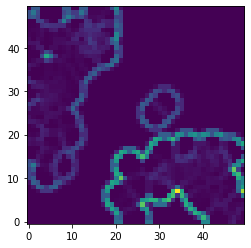

In [6]:
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

graph = tf.Graph()
with graph.as_default():
    # Make sure you allow_soft_placement, some ops have to be put on the CPU (e.g. summary operations)
    session = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(
        allow_soft_placement=True,
        log_device_placement=False))

    num_inputs = 10240
    dims = 2
    clusters = 3
    # Makes toy clusters with pretty clear separation, see the sklearn site for more info
    #blob_data = make_blobs(num_inputs, dims, clusters)
    blob_data = make_blobs(n_samples=num_inputs,  n_features=dims, centers=clusters)
    # Scale the blob data for easier training. Also index 0 because the output is a (data, label) tuple.
    scaler = StandardScaler()
    input_data = scaler.fit_transform(blob_data[0])
    batch_size = 128

    # Build the TensorFlow dataset pipeline per the standard tutorial.
    dataset = tf.data.Dataset.from_tensor_slices(input_data.astype(np.float32))
    dataset = dataset.repeat()
    dataset = dataset.batch(batch_size)
    iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)
    next_element = iterator.get_next()

    # This is more neurons than you need but it makes the visualization look nicer
    m = 50
    n = 50

    # Build the SOM object and place all of its ops on the graph
    som = SelfOrganizingMap(m=m, n=n, dim=dims, max_epochs=2, gpus=1, session=session, graph=graph,
                            input_tensor=next_element, batch_size=batch_size, initial_learning_rate=0.1, weights_init=None)

    init_op = tf.compat.v1.global_variables_initializer()
    session.run([init_op])

    # Note that I don't pass a SummaryWriter because I don't really want to record summaries in this script
    # If you want Tensorboard support just make a new SummaryWriter and pass it to this method
    som.train(num_inputs=num_inputs)

    print("Final QE={}",som.quantization_error(tf.constant(input_data, dtype=tf.float32)))
    print("Final TE={}",som.topographic_error(tf.constant(input_data, dtype=tf.float32)))
    
    weights = som.output_weights
    
    umatrix, bmu_loc = get_umatrix_optimized(input_data,weights, m, n)
    fig = plt.figure()
    plt.imshow(umatrix.reshape((m, n)), origin='lower')
    plt.show(block=True)



In [7]:
blob_data[1].shape

(10240,)

In [8]:
blob_data[0].shape

(10240, 2)

In [9]:
blob_data[0]

array([[ 9.41217142,  7.237222  ],
       [ 7.69057077,  6.4075085 ],
       [ 8.4718253 ,  9.15283971],
       ...,
       [10.17406835,  6.95297814],
       [ 9.19043664,  7.0741056 ],
       [ 0.78025404, -7.38817176]])

# Автоэнкодеры

Источники 
http://repo.ssau.ru/bitstream/Informacionnye-tehnologii-i-nanotehnologii/Klasterizaciya-izobrazheniya-po-vizualnomu-podobiu-s-pomoshu-avtoenkodera-76257/1/paper28.pdf
https://habr.com/ru/post/349048/
https://matthew-parker.rbind.io/post/2021-01-16-pytorch-keras-clustering/



Автоэнкодинг - это алгоритм компрессии данных, где функции кодирования и декодирования 1) специфичны для данных 2) имеют потери 3) обучаются автоматически из примеров. Автоэнкодеры могут быть реализованы с помощью ИНС. (https://blog.keras.io/building-autoencoders-in-keras.html)
В общем случае, задача применения автоэнкодера похожа на самоорганизующуюся карту Кохонена - уменьшение входной размерности для лучшего представления результатов. 
Но в общем случае работа с автоэнкодерами больше похожа на работу с классической ИНС.

(есть также связь с алгоритмами выделения главных компонент PCA и т.п.)
Общий вид ИНС, уменьшающий размерность входных данных, такой:
*   На вход подаются данные в той размерности, в которой они представлены
*   Сеть в процессе обучения подбирает веса таким образом, чтобы комбинация данных соответствовала двух-трёхмерному выходу
*   На выходе получаем вектор, меньшей размерности, который удобно пресдтавить в 2/3D картинки, причём, входы со схожими параметрами на графиках визуально находятся близко друг к другу. 


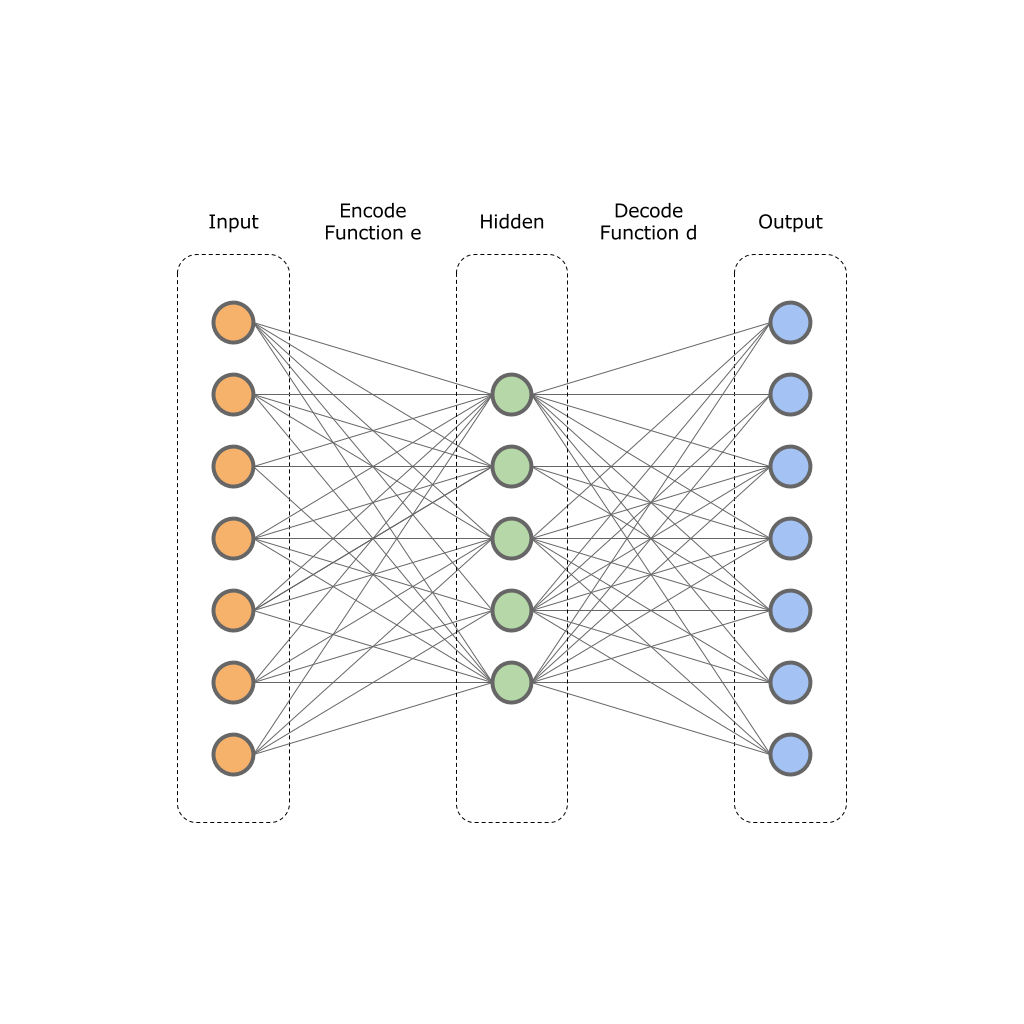

В качестве пример выполним код из источника https://matthew-parker.rbind.io/post/2021-01-16-pytorch-keras-clustering/ и попробуем что-нибудь поменять в настройках.
Там описан процесс кластеризации данных на  датасете Amazon Cell Phones Reviews https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews Использовалась только первая часть датасета.

Датасет представляет собой отзывы на телефоны, их характеристики и рейтинг.
Целью всей работы является поиск групп телефонов по схожести. Целью работы ИНС - преобразование размерности из n-мерного в трёх.



In [15]:
import numpy as np  # numpy for math
import pandas       # for dataframes and csv files
import matplotlib.pyplot as plt  # for plotting
from matplotlib import animation  # animate 3D plots
from mpl_toolkits.mplot3d import Axes3D  # 3D plots

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import manifold

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras

In [20]:
items_csv = pandas.read_csv(r"/content/drive/MyDrive/Datasets/20191226-items.csv")
items_csv.head(3) # look at top 3 items
items_csv.shape   # what is the size of the data?

(720, 10)

In [21]:
items_csv.head(3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0


In [22]:
# Чистка данных и удаление неинформативных столбцов

items_features = items_csv.copy().dropna()

items_features.pop("url")
items_features.pop("image")
items_features.pop("reviewUrl")
p_labels = items_features.pop("asin")

Далее собирается словарь признаков 

In [23]:
inputs = {}
for name, column in items_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'brand': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'brand')>,
 'title': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'title')>,
 'rating': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'rating')>,
 'totalReviews': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'totalReviews')>,
 'price': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'price')>,
 'originalPrice': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'originalPrice')>}

Пайплайн для обработки числовых признаков

In [24]:
numeric_inputs = {name: input for name, input in inputs.items() if input.dtype == tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(items_features[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
preprocessed_inputs = [all_numeric_inputs]

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization')>

Пайплайн для обработки текстовых признаков (авто использует one-hot кодирование)

In [25]:
# deal with string features
for name, input in inputs.items():
    if input.dtype != tf.string:
        continue

    lookup = preprocessing.StringLookup(vocabulary=np.unique(items_features[name]))
    one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x) # append preprocessed feature to features list
    
preprocessed_inputs

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization')>,
 <KerasTensor: shape=(None, 11) dtype=float32 (created by layer 'category_encoding')>,
 <KerasTensor: shape=(None, 715) dtype=float32 (created by layer 'category_encoding_1')>]

Общий пайплайн

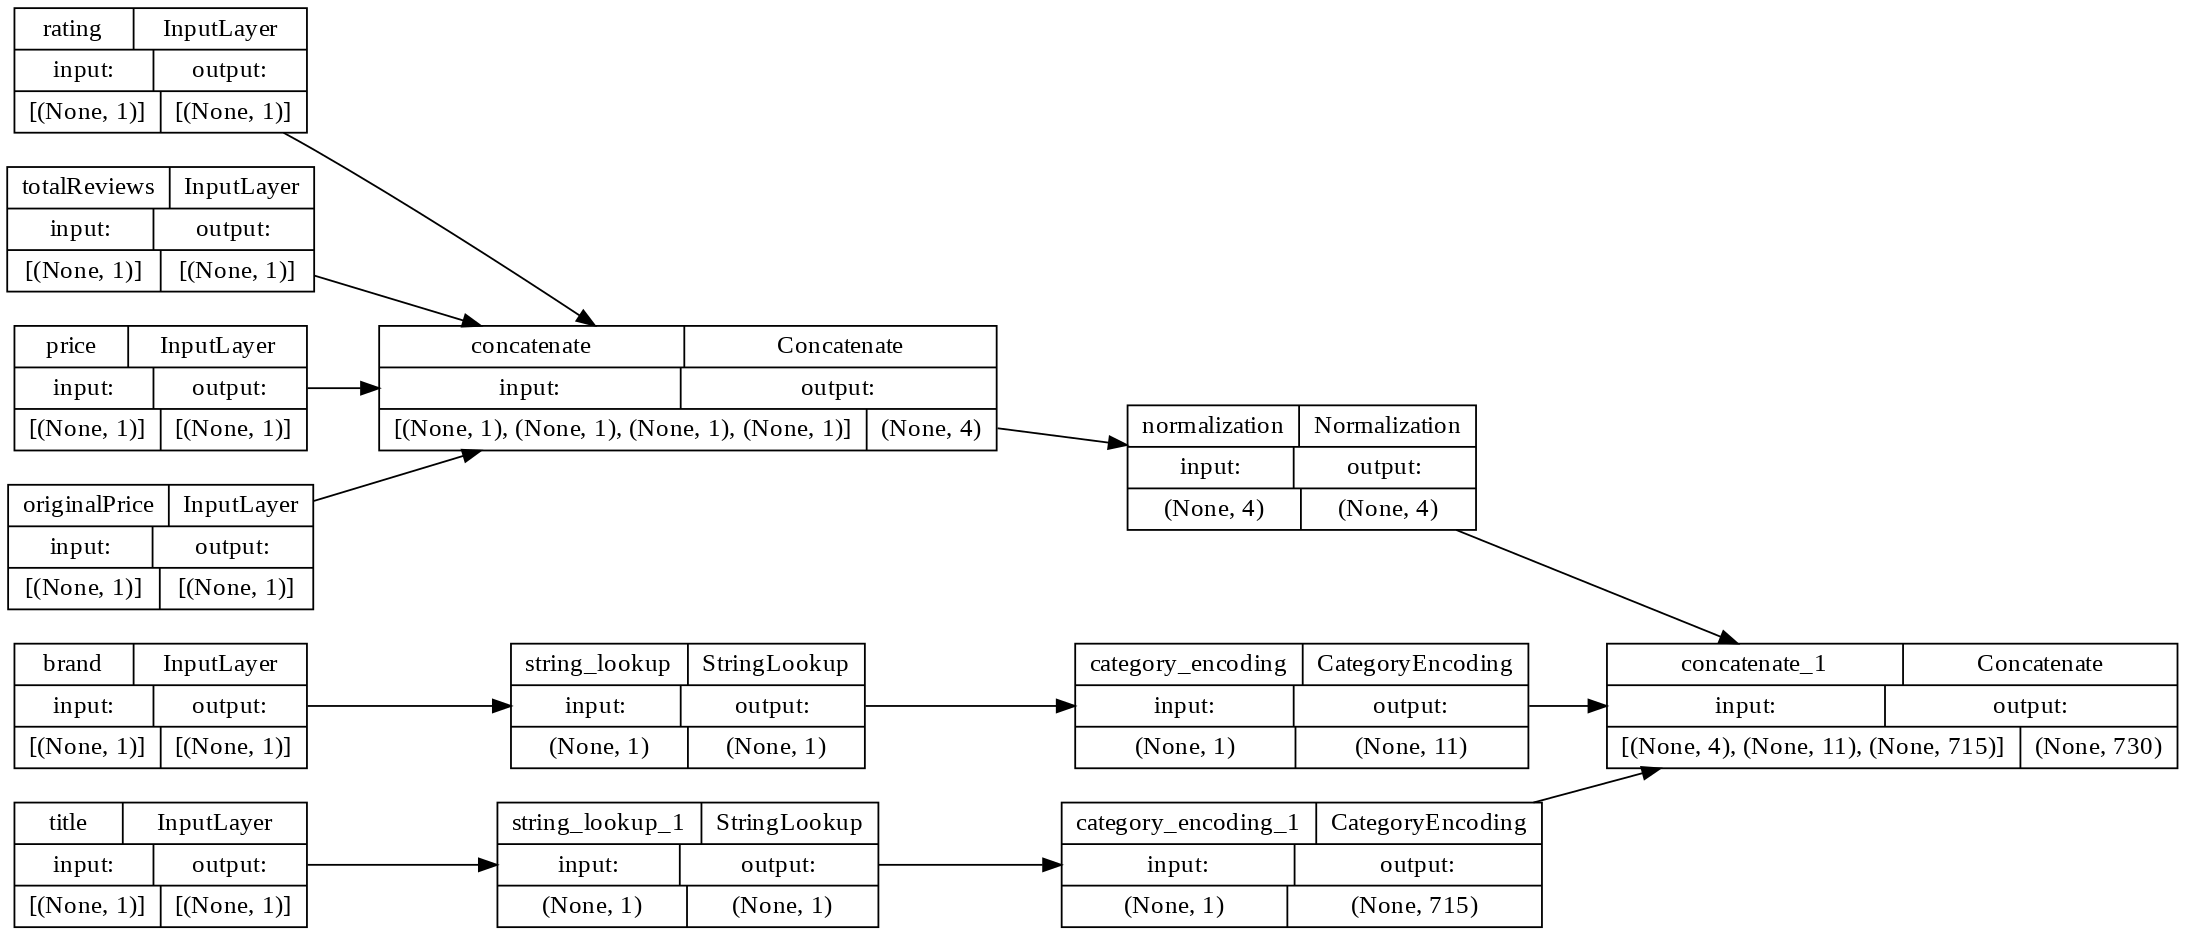

In [26]:
preprocessed_inputs_cat = keras.layers.Concatenate()(preprocessed_inputs)
preprocessing_layer = tf.keras.Model(inputs, preprocessed_inputs_cat, name="ProcessData")

# this saves an image of the model, see note regarding plot_model issues
tf.keras.utils.plot_model(model=preprocessing_layer, rankdir="LR", dpi=130, show_shapes=True, to_file="processing.png")

В итоге объединение нам даст 730 различных признаков. Больше всего к нам пришло из one-hot кодирования

Собираем две строчки данных для примера

In [27]:
items_features_dict = {name: np.array(value) for name, value in items_features.items()}

# grab two samples
two_sample_dict = {name:values[1:3, ] for name, values in items_features_dict.items()}
two_sample_dict

{'brand': array(['Motorola', 'Motorola'], dtype=object),
 'title': array(['MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE CELL PHONE',
        'Motorola i335 Cell Phone Boost Mobile'], dtype=object),
 'rating': array([2.7, 3.3]),
 'totalReviews': array([22, 21]),
 'price': array([99.99,  0.  ]),
 'originalPrice': array([0., 0.])}

и смотрим, в какой вектор перестраивается каждая строчка

In [28]:

two_sample_fitted = preprocessing_layer(two_sample_dict)

two_sample_fitted

<tf.Tensor: shape=(2, 730), dtype=float32, numpy=
array([[-1.4144897 , -0.50023955, -0.675715  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.57760143, -0.5061967 , -1.1760993 , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)>

Модель автоэнкодера преставлена ниже

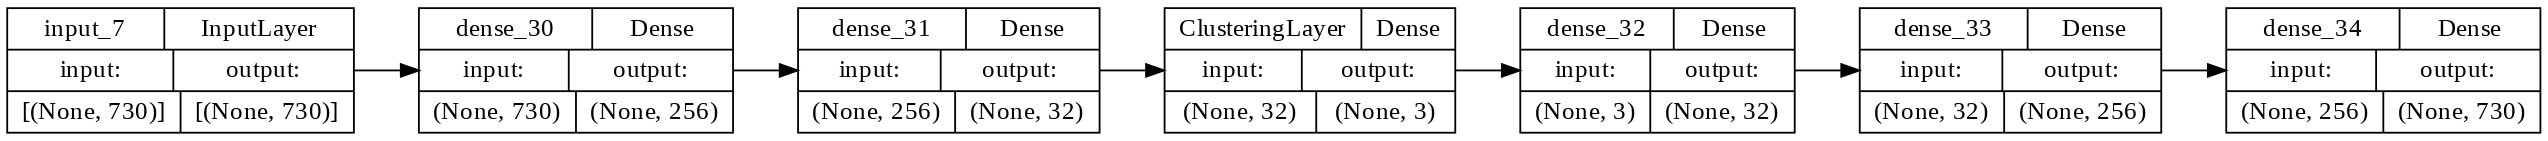

In [38]:
# This is the size of our input data
full_dim = two_sample_fitted.shape.as_list()[1]

# these are the downsampling/upsampling dimensions
encoding_dim1 = 256 # поигрались с размерностью энкодера
encoding_dim2 = 32
encoding_dim3 = 3 # we will use these 3 dimensions for clustering не меняем

# This is our encoder input
encoder_input_data = keras.Input(shape=(full_dim,))

# the encoded representation of the input Энкодер

encoded_layer1 = keras.layers.Dense(encoding_dim1, activation='relu')(encoder_input_data)
encoded_layer2 = keras.layers.Dense(encoding_dim2, activation='relu')(encoded_layer1)
# Note that encoded_layer3 is our 3 dimensional "clustered" layer, which we will later use for clustering
encoded_layer3 = keras.layers.Dense(encoding_dim3, activation='relu', name="ClusteringLayer")(encoded_layer2)

encoder_model = keras.Model(encoder_input_data, encoded_layer3)

# the reconstruction of the input Декодер
decoded_layer3 = keras.layers.Dense(encoding_dim2, activation='relu')(encoded_layer3)
decoded_layer2 = keras.layers.Dense(encoding_dim1, activation='relu')(decoded_layer3)
decoded_layer1 = keras.layers.Dense(full_dim, activation='sigmoid')(decoded_layer2)

# This model maps an input to its autoencoder reconstruction
autoencoder_model = keras.Model(encoder_input_data, outputs=decoded_layer1, name="Encoder")

# compile the model
autoencoder_model.compile(optimizer="RMSprop", loss=tf.keras.losses.mean_squared_error)
tf.keras.utils.plot_model(model=autoencoder_model, rankdir="LR", dpi=130, show_shapes=True, to_file="autoencoder.png")

Обучение автоэнкодера заключается в следующем. Нам необходимо "упаковать" (закодировать) данные, потом их "распаковать" (декодировать). И смотреть, на сколько наша распаковка отличается от того, что было предложено на входе. Веса корректируются исходя из того, на сколько мы далеки от входного вектора. 

Модель
encoding_dim1 = 256 # поигрались с размерностью энкодера
encoding_dim2 = 32
encoding_dim3 = 3 # we will use these 3 dimensions for clustering
Резульат

3/3 [==============================] - 0s 21ms/step - loss: 0.0046 - val_loss: 0.0059

Модель
encoding_dim1 = 128 # поигрались с размерностью энкодера
encoding_dim2 = 16
Результат

3/3 [==============================] - 0s 18ms/step - loss: 0.0047 - val_loss: 0.0065


Модель
encoding_dim1 = 512 # поигрались с размерностью энкодера
encoding_dim2 = 64
Результат

Epoch 1000/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0045 - val_loss: 0.0063



In [ ]:
# process the inputs
p_items = preprocessing_layer(items_features_dict)

# split into training and testing sets (80/20 split)
train_data, test_data, train_labels, test_labels = train_test_split(p_items.numpy(), p_labels, train_size=0.8, random_state=5)

# fit the model using the training data
history = autoencoder_model.fit(train_data, train_data, epochs=1000, batch_size=256, shuffle=True, validation_data=(test_data, test_data))

Строим графики изменения ошибки

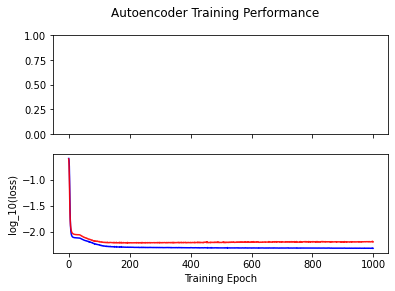

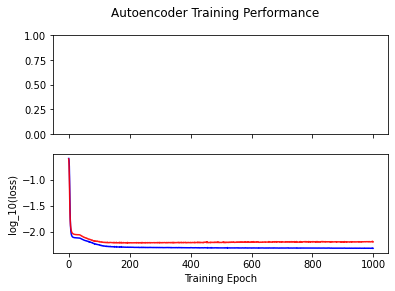

In [41]:
# Investigate training performance:
history_fig, (ax1, ax2) = plt.subplots(2, sharex=True)
history_fig.suptitle('Autoencoder Training Performance')
ax1.plot(range(0,1000), history.history['accuracy'], color='blue')
ax1.set(ylabel='Reconstruction Accuracy')
ax2.plot(range(0,1000), np.log10(history.history['loss']), color='blue')
ax2.plot(range(0,1000), np.log10(history.history['val_loss']), color='red', alpha=0.9)
ax2.set(ylabel='log_10(loss)', xlabel='Training Epoch')
history_fig

Далее для кластеризации используется алгоритм К-среднего (классика DS). Предположительное число классов от 1 до 30. Выводим графи, чтоыб понять, какое число классов будет оптимальным

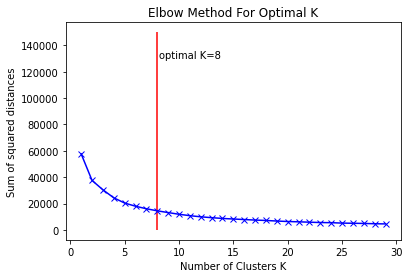

In [42]:
encoded_items = encoder_model(p_items)

# choose number of clusters K:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(init='k-means++', n_clusters=k, n_init=10)
    km.fit(encoded_items)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.vlines(ymin=0, ymax=150000, x=8, colors='red')
plt.text(x=8.2, y=130000, s="optimal K=8")
plt.xlabel('Number of Clusters K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')
plt.show()

Авторы решили, что оптимальным будет число от 5 до 10, т.к. после пяти резко перестаёт расти сумма расстояний между классами, а брать число классов больше 10 - не оптимально, т.к. наша задача - сгруппировать, т.е. выделить наиболее похожие между собой, а не наплодить новых классов 


In [43]:
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10)
kmeans.fit(encoded_items)
P = kmeans.predict(encoded_items)

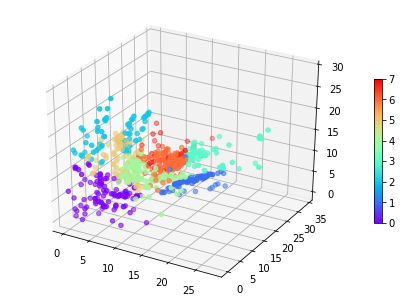

In [47]:
import matplotlib.animation as animation

def rotate(angle):
     ax.view_init(azim=angle)
     
# visualize the clusters:
encoded_fig = plt.figure()
ax = Axes3D(encoded_fig)
p = ax.scatter(encoded_items[:,0], encoded_items[:,1], encoded_items[:,2], c=P, marker="o", picker=True, cmap="rainbow")
plt.colorbar(p, shrink=0.5)
plt.show()

angle = 3
ani = animation.FuncAnimation(encoded_fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save('kmeans_fig.gif', writer=animation.PillowWriter(fps=12))

Пробую использовать 10 классов

In [48]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(encoded_items)
P = kmeans.predict(encoded_items)

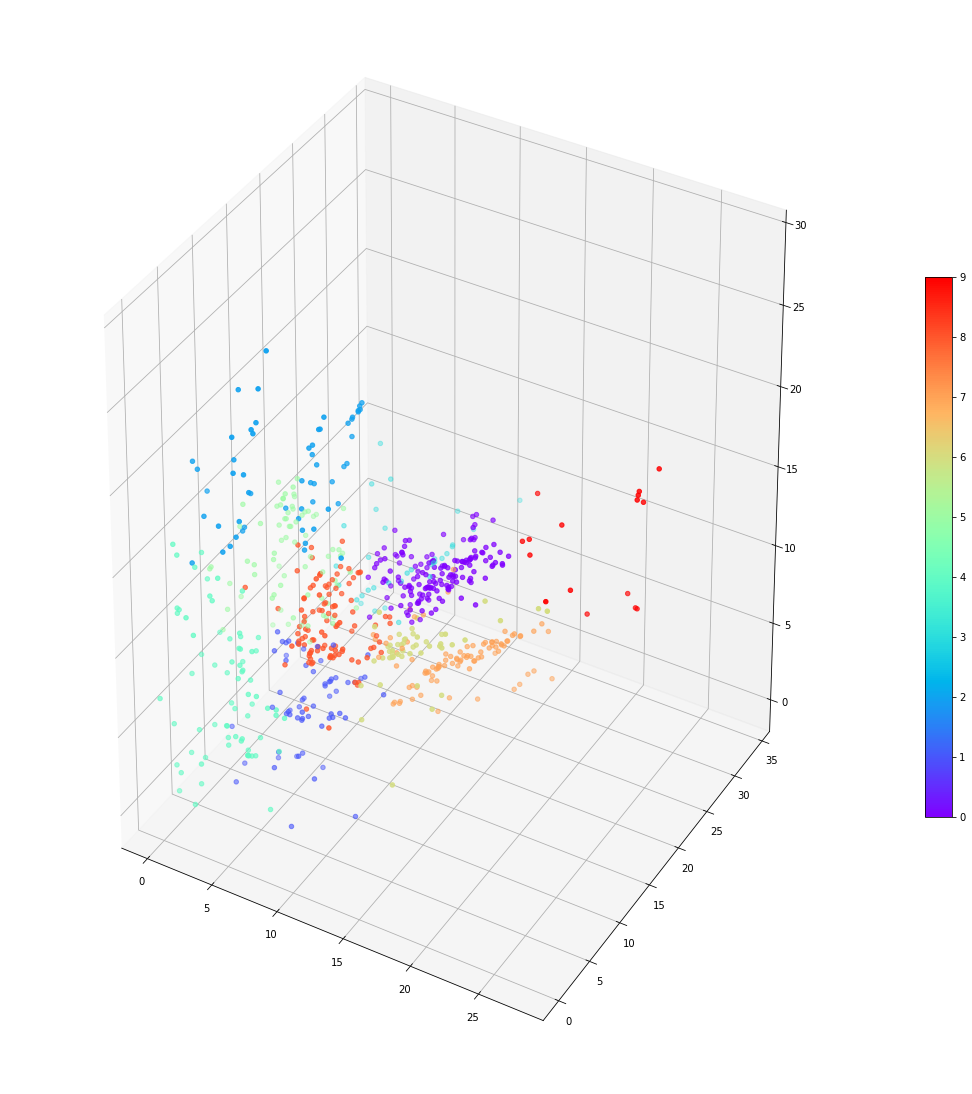

In [54]:
# visualize the clusters:
encoded_fig = plt.figure(figsize=[15,15])
ax = Axes3D(encoded_fig)
p = ax.scatter(encoded_items[:,0], encoded_items[:,1], encoded_items[:,2], c=P, marker="o", picker=True, cmap="rainbow")
plt.colorbar(p, shrink=0.5)
plt.show()

angle = 3
ani = animation.FuncAnimation(encoded_fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save('./kmeans_fig.gif', writer=animation.PillowWriter(fps=25))

# Вывод

Использование ИНС позволяет не только выполнять интерполяцию и экстраполяюцию, что происходит при обучении с учителем, но и может быть широко применено при обучении без учителя в задачах кластеризации и уменьшения размерности данных.
Для задач извлечения структуры из больших данных кластеризация и извлечение признаков оказывается практически незаменимым инструментом и позволяет улучшать модели путём получения лучшего приближения в задачах классификации, автоматически сегментировать входные данные и представлять многомерные вектора-признаки в удобном для человека виде.